#### Source du dataset : https://data.world/nrippner/titanic-disaster-dataset

In [1]:
# On importe les librairies

# On commence avec les librairies d'analyse exploratoire : 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# On importe ensuite les librairies nous permettant de faire de l'analyse prédictive 

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling  import SMOTE

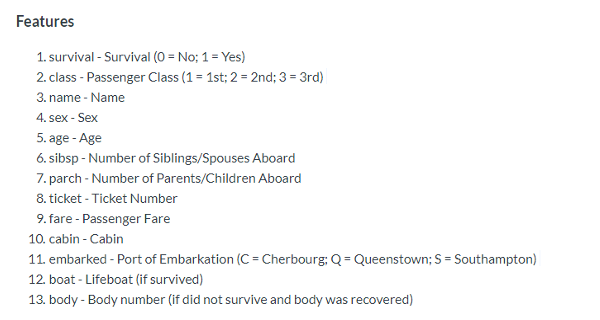

In [2]:
%matplotlib inline
from IPython.display import Image
Image(r'/Users/oumarba/Pictures/titanic.png')

### Analyse exploratoire

In [3]:
df = pd.read_excel(r'/Users/oumarba/Documents/Dataset for python/titanic3.xls')
df.columns = df.columns.str.replace('.', '_')


/var/folders/_c/x48h08_94n99bg2gfbdyrym80000gn/T/ipykernel_20232/320142909.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [4]:
#On affiche les premières lignes du dataset
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.shape

(1309, 14)

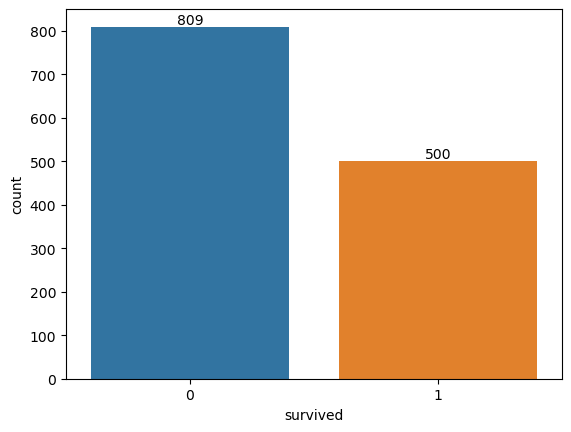

In [6]:
#Quelle est la part des survivants ?
ax = sns.countplot(x = 'survived',data = df)
for container in ax.containers:
    ax.bar_label(container)




Le nombre de morts surpassent le nombre de survivants, nous allons nous concentrer sur la part que représentent les hommes et femmes dans ceux qui ont ou non survecu.

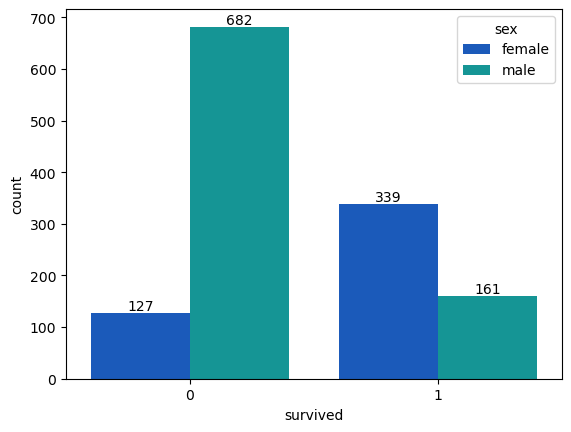

In [7]:
#Quelle est la part des survivant selon le genre du passager ? 

ax = sns.countplot(x='survived', hue='sex', data=df,palette='winter')
for container in ax.containers:
    ax.bar_label(container)

Les hommes représentent la grande majorité des non-survivants. Les femmes représentent cependant la majorité des survivants.

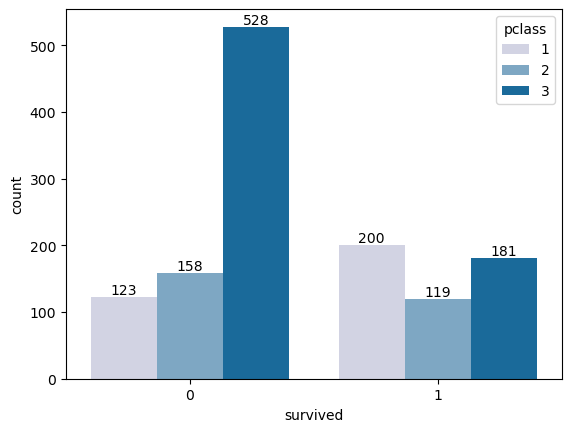

In [8]:
#Quelle est la part des survivants en fonction de la classe du passager ? 

ax = sns.countplot(x = 'survived', hue = 'pclass', data=df, palette ='PuBu')
for container in ax.containers:
    ax.bar_label(container)


Les voyageurs en classe 3, c'est-à-dire ceux ayant payé le moins cher leur tickets, sont ceux qui ont le moins survécu.
Cependant les voyageurs en classe 1 ont de meilleures chances de survie.

In [9]:
#Provenance des passagers 

df['embarked'].value_counts(normalize=True)*100

S    69.931140
C    20.657995
Q     9.410865
Name: embarked, dtype: float64

La grande majorité des passagers proviennent du port de Southampton, ville portuaire située dans le sud de l'Angleterre.

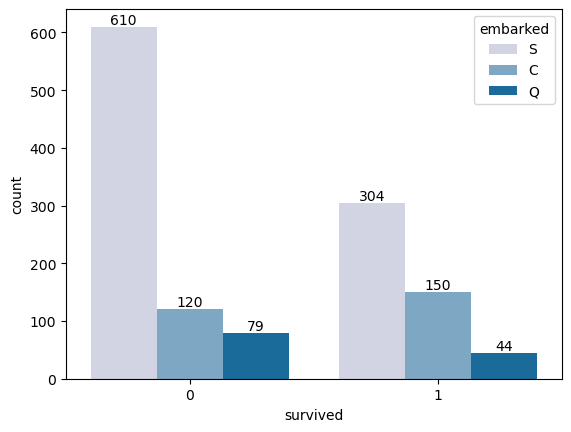

In [10]:
#D'où proviennent les passagers qui ont survécu ? 
ax = sns.countplot(x = 'survived', hue = 'embarked', data=df, palette ='PuBu')
for container in ax.containers:
    ax.bar_label(container)

Les passagers provenant du port de Southampton ont été nombreux à ne pas avoir survécus.

Text(0.5, 1.0, "Répartition des passagers en fonction de l'âge")

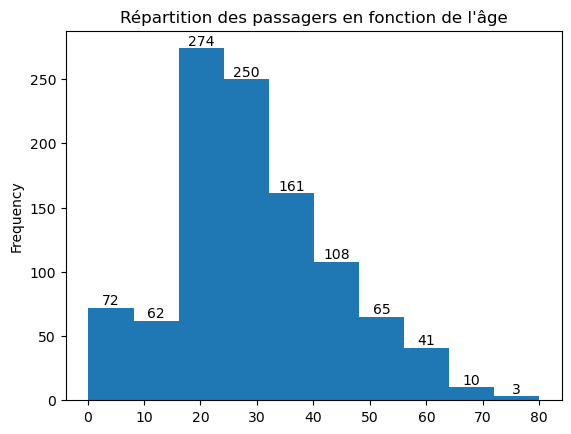

In [11]:
#Quelle est la réparition des passagers selon leur âge ? 
ax = df['age'].plot.hist()
for container in ax.containers:
    ax.bar_label(container)
plt.title("Répartition des passagers en fonction de l'âge")


La majorité des passagers sont plutôt jeunes, on voit en effet que la majorité d'entre eux ont entre 20 et 40 ans. 
Une très petite minorité de passagers ont au dessus de 70 ans.

Text(0.5, 1.0, "Distribution des survivants en fonction de l'âge des passager")

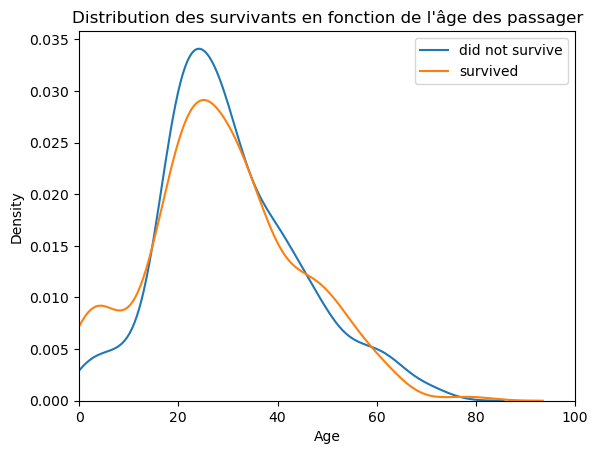

In [12]:
sns.kdeplot(df['age'][df['survived']==0], label='did not survive')
sns.kdeplot(df['age'][df['survived']==1], label='survived')
plt.legend()
plt.xlim(0,100)
plt.xlabel('Age')
plt.title("Distribution des survivants en fonction de l'âge des passager")

La distribution des survivants et des non-survivants est assez similaire selon l'âge des passagers. Cependant, on remarque que les passagers les plus jeunes ont plus survécu. Les jeunes adultes entre 20 et 40 ans ont moins survécu. 

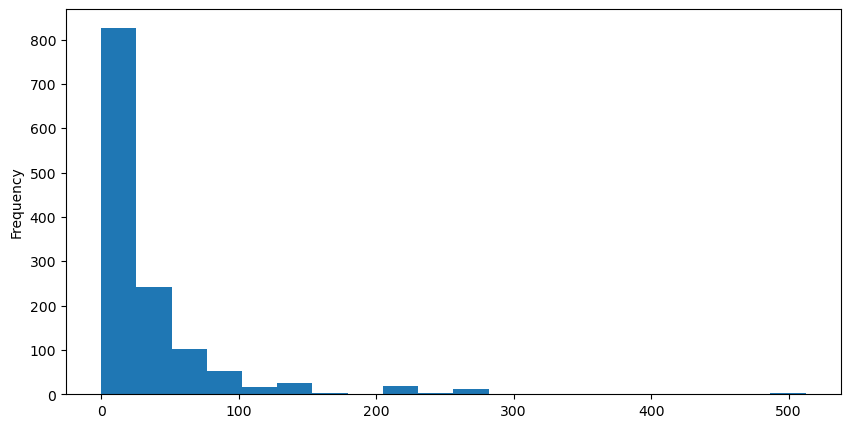

In [13]:
ax = df['fare'].plot.hist(bins=20, figsize=(10,5))

La majorité des billets d'embarquement ont été payé à des frais inférieurs à 100. 
Une minorité de passagers ont cependant payé des billets dont les frais sont au dessus de 200.

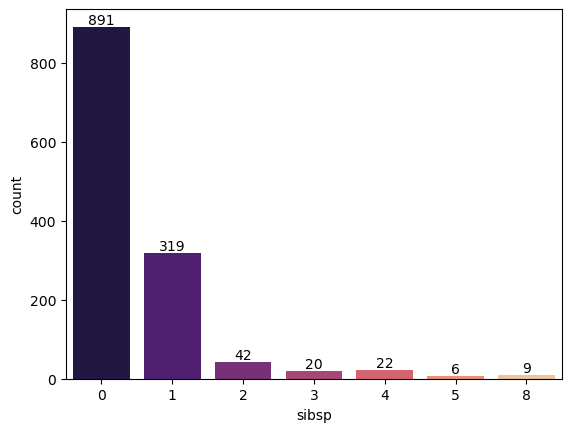

In [14]:
ax = sns.countplot(x='sibsp',data=df, palette='magma')
for container in ax.containers:
    ax.bar_label(container)

La plupart des passagers sont venus sans frères et soeurs, ou époux.

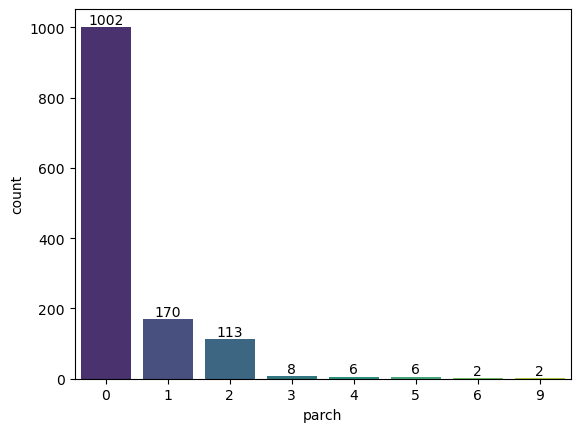

In [15]:
ax = sns.countplot(x='parch', data=df, palette ='viridis')
for container in ax.containers:
    ax.bar_label(container)

La plupart des passagers sont venus sans parents ou enfants.

### Nettoyage et préparation des données

In [16]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

La plupart des valeurs nulles du dataset sont dans les colonnes 'cabin' et 'age'.

<AxesSubplot:>

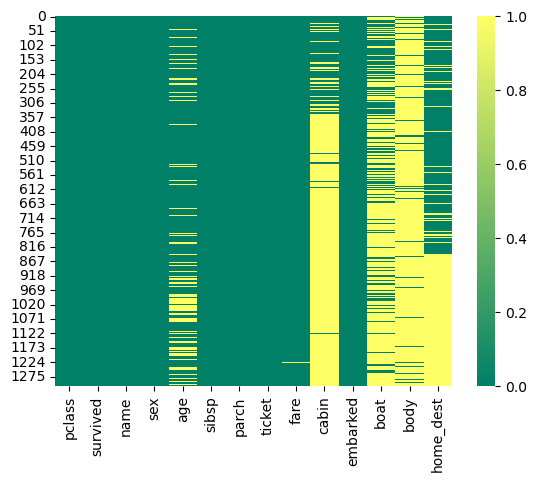

In [17]:
sns.heatmap(df.isnull(),cmap='summer')

On peut représenter les valeurs nulles dans une heatmap.

<AxesSubplot:xlabel='pclass', ylabel='age'>

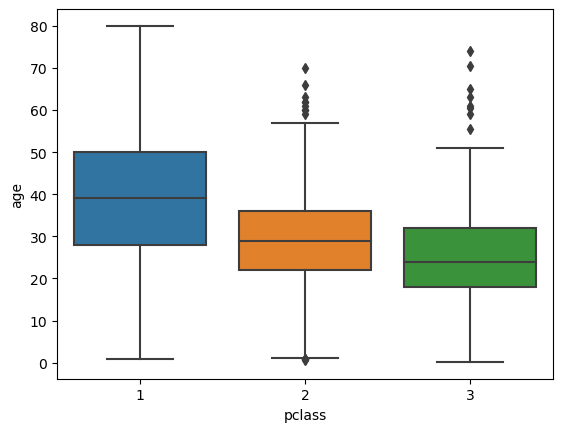

In [18]:
sns.boxplot(x = 'pclass', y = 'age', data=df)

On remarque que plus l'âge du passager augmente, plus il a de chances d'être en 1ère classe.

#### Nous pouvons supprimer des colonnes qui ne seront pas nécessaires pour notre modèle.

In [19]:
#On va faire une vérification rapides des valeurs nulles
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64

<AxesSubplot:>

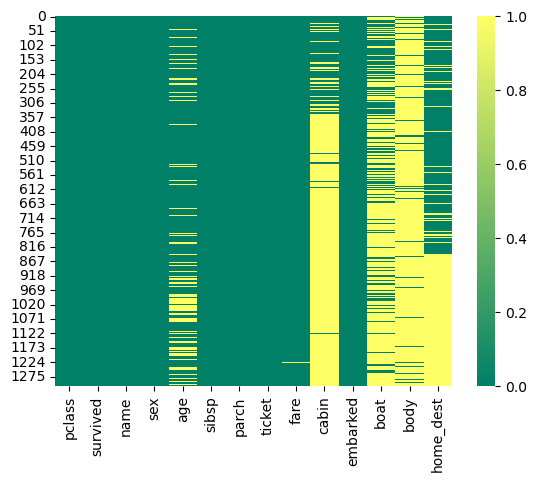

In [20]:
sns.heatmap(df.isnull(),cmap='summer')

#### On remarque un très grand nombre de valeurs nulles dans certaines colonnes. Aussi, nous estimons que ces dernières ne sont pas les plus pertinentes dans la création de notre modèle.
#### Nous avons donc fait le choix de les enlever de notre dataframe.

In [21]:
df.drop(['cabin','boat','body','home_dest'],axis = 1, inplace=True)

In [22]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


#### On enlève les valeurs nulles du dataset

In [23]:
df.dropna(inplace=True)

<AxesSubplot:>

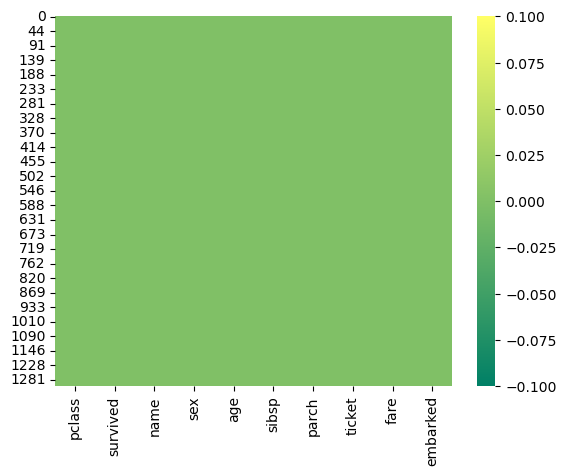

In [24]:
sns.heatmap(df.isnull(),cmap='summer')

In [25]:
print(df.isnull().sum())

print('Nb de lignes dans le dataset:' , len(df))

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64
Nb de lignes dans le dataset: 1043


Notre dataset ne contient plus de valeurs nulles. 

Lors des modèles prédictifs que nous avons vus en cours, il était nécessaire de supprimer les colonnes redondantes, pour pouvoir améliorer la qualité du modèle et éviter des risques de surapprentissage. Nous allons donc réarranger le dataset afin d'éviter ce type de problème. 
Pour ce faire, nous allons convertir certaines colonnes en données catégoriques.

In [26]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [27]:
pd.get_dummies(df['sex']).head()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [28]:
sex = pd.get_dummies(df['sex'], drop_first=True)
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


La fonction get_dummies nous a permis de transformer les variables catégorielles en une serié de valeurs binaires (0 ou 1). 

Cependant, les colonnes male et female sont liées entre elles car les variables sont fortement corrélées entre elles, c'est à dire que si un passager est un homme, la valeur dans la colonne femme sera forcément nulle.

Pour éviter ce problème de colinéarité, nous avons décidé de conserver uniquement la colonne male.

On fera de même avec la colonne 'embarked'.

In [29]:
embark = pd.get_dummies(df['embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
Pclass1 = pd.get_dummies(df['pclass'], drop_first=True)
Pclass1.rename(columns={2:'Pclass_2',3:'Pclass_3'},inplace=True)
Pclass1

,Pclass_2,Pclass_3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1301,0,1
1304,0,1
1306,0,1
1307,0,1


Il en est de même avec la classe du passager, un passager en classe 1 signifie que les valeurs en classe 2 et 3 sont nulles. Nous supprimons donc la colonne des passagers en classe 1, afin d'éviter la colinéarité entre les variables.

In [31]:
df = pd.concat([df,sex,Pclass1,embark], axis=1)

In [32]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Pclass_2,Pclass_3,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,0,0,1


In [33]:
#Suppression des colonnes que nous n'utiliserons pas dans le modèle

df.drop(['pclass', 'name', 'sex', 'ticket','embarked'],axis=1, inplace=True)

In [34]:
df.head()

,survived,age,sibsp,parch,fare,male,Pclass_2,Pclass_3,Q,S
0,1,29.0000,0,0,211.3375,0,0,0,0,1
1,1,0.9167,1,2,151.5500,1,0,0,0,1
2,0,2.0000,1,2,151.5500,0,0,0,0,1
3,0,30.0000,1,2,151.5500,1,0,0,0,1
4,0,25.0000,1,2,151.5500,0,0,0,0,1


In [35]:
df.shape

(1043, 10)

### Entraînement et test des modèles de prédictions

Nous allons effectuer nos tests sur 3 modèles de prédictions :

    - Regression logistique
    - Decision Tree
    - Random forest

In [36]:
X = df.drop('survived', axis = 1)
y = df['survived']

In [37]:
#On crée nos données d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

1) Modèle de régression logistique

In [38]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)
print(classification_report(y_test, prediction))

#Matrice de confusion :

print('Matrice de confusion:')
print(confusion_matrix(y_test, prediction))

#Score de précision : 

score_logistic_regression = round(accuracy_score(y_test, prediction)*100,2)
print("Le score de précision de notre modèle :",score_logistic_regression)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       195
           1       0.76      0.67      0.71       118

    accuracy                           0.80       313
   macro avg       0.79      0.77      0.78       313
weighted avg       0.79      0.80      0.79       313

Matrice de confusion:
[[170  25]
 [ 39  79]]
Le score de précision de notre modèle : 79.55


/Users/oumarba/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.Arbre de décision

In [39]:
Decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=7)
Decision_tree_model.fit(X_train, y_train)
prediction = Decision_tree_model.predict(X_test)
print(classification_report(y_test, prediction))

#Matrice de confusion :

print('Matrice de confusion:')
print(confusion_matrix(y_test, prediction))

#Score de précision : 

score_decision_tree = round(accuracy_score(y_test, prediction)*100,2)
print("Le score de précision de notre modèle :",score_decision_tree)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       195
           1       0.72      0.78      0.75       118

    accuracy                           0.81       313
   macro avg       0.79      0.80      0.80       313
weighted avg       0.81      0.81      0.81       313

Matrice de confusion:
[[160  35]
 [ 26  92]]
Le score de précision de notre modèle : 80.51


3.Random forest

In [40]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)
print(classification_report(y_test, prediction))

#Matrice de confusion :

print('Matrice de confusion:')
print(confusion_matrix(y_test, prediction))

#Score de précision : 

score_random_forest =round(accuracy_score(y_test, prediction)*100,2)
print("Le score de précision de notre modèle :",score_random_forest)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       195
           1       0.73      0.74      0.73       118

    accuracy                           0.80       313
   macro avg       0.79      0.79      0.79       313
weighted avg       0.80      0.80      0.80       313

Matrice de confusion:
[[163  32]
 [ 31  87]]
Le score de précision de notre modèle : 79.87


In [41]:
results = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
            'Score':[score_logistic_regression,score_decision_tree,score_random_forest ]})
results = results.sort_values(by = 'Score', ascending = False).set_index('Model')

In [42]:
results

,Score
Model,
Decision Tree,80.51
Random Forest,79.87
Logistic Regression,79.55


Parmi les 3 modèles que nous avons testé, la regression logistique a le meilleur score de précision, nous allons donc utiliser ce modèle pour effectuer la prédiction de survie des passagers du Titanic. 